<a href="https://colab.research.google.com/github/mochamadfarizi/PCVK_Genap_2021/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


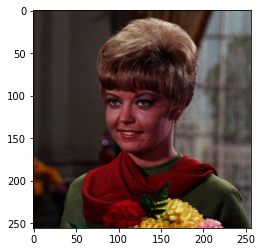

In [2]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/gambar/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 12


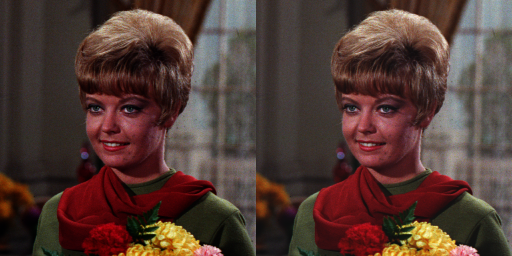

In [3]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/gambar/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran
seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra
---------------------------------
Masukkan tingkat kecerahan[-255 - 255]: 200
Masukkan kontras [1.0-3.0]: 2.0


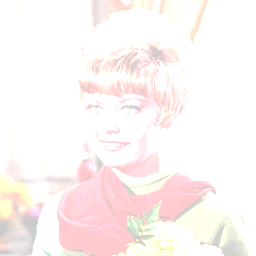

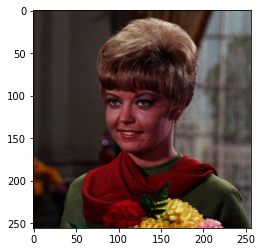

In [4]:
new_image = np.zeros(image.shape, image.dtype)

print(' Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan tingkat kecerahan[-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0-3.0]: '))
except ValueError:
    print('Error, not a number')


for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(contrast*image[y,x,c] + brightness, 0, 255)
plt.imshow(image)
cv2_imshow(cv.cvtColor(new_image,cv.COLOR_BGR2RGB))

In [ ]:
2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga
menghasilkan keluaran seperti berikut:

 mengubah tingkat kecerahan citra dengan transform log 
 -------------------------------- 
Masukan nilai kecerahan: 12


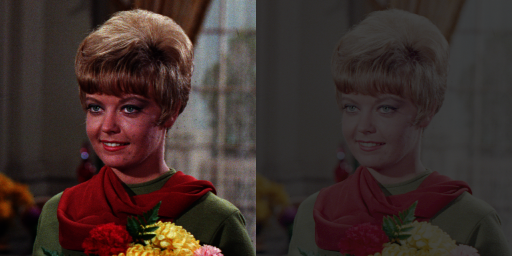

In [5]:
print(' mengubah tingkat kecerahan citra dengan transform log ')
print(' -------------------------------- ')

try:
    brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = image
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(cv.cvtColor(final_frame,cv.COLOR_BGR2RGB))

3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

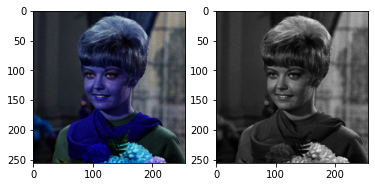

In [6]:
img1 = image
img2 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

gray_img = np.mean(img2, axis=2)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img2)
axarr[1].imshow(gray_img, cmap='gray')

b. Lightness

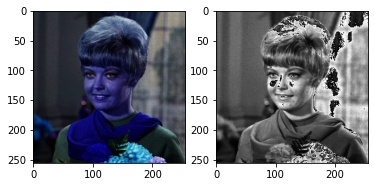

In [7]:
R, G, B = img2[:,:,0], img2[:,:,1], img2[:,:,2]
max_channels = np.maximum(np.minimum(R, G), B)
min_channels = np.minimum(np.minimum(R, G), B)

gray_img = 0.5 * (max_channels + min_channels)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img2)
axarr[1].imshow(gray_img, cmap='gray')

c. Luminance

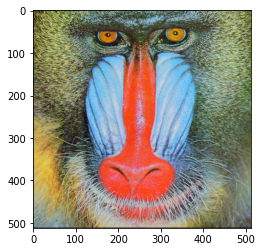

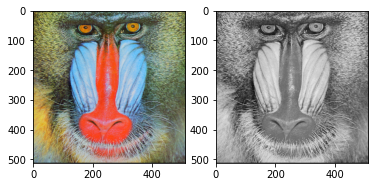

In [10]:
import cv2 as cv 
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math

img = cv.imread('/content/drive/MyDrive/gambar/mandrill.tiff')
img_color = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img_color)

R, G, B = img_color[:,:,0], img_color[:,:,1],img_color[:,:,2]

gray_img = (0.21 * R) + (0.72 * G) + (0.07 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img_color)
axarr[1].imshow(gray_img, cmap='gray')

4. . Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna
merah menjadi grayscale seperti pada contoh berikut:

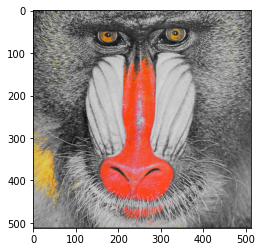

In [11]:
r = cv.imread('/content/drive/MyDrive/gambar/mandrill.tiff')
finimg = cv.cvtColor(r, cv.COLOR_BGR2RGB)
ret, mask = cv.threshold(r[:, :,2], 200, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(r)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

red = cv.bitwise_and(finimg, mask3)
gray = cv.cvtColor(finimg, cv.COLOR_BGR2GRAY)
finimg  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(finimg, 255 - mask3)

ed = gray + red
plt.imshow(ed)
axarr[1].imshow(gray_img, cmap='gray')